In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline

In [4]:
total_emp_uemprate=pd.read_csv("ER Time Series - July 2019.csv")
LGA_uemp_rate=pd.read_csv("IVI_DATA_regional - May 2010 onwards.csv")
vacancy=pd.read_csv("Vacancy.csv")


In [5]:
total_emp_uemprate.head()
#LGA_uemp_rate.head()

,Employment Region,State/Territory,Date,Unemployment Rate (15+),Participation Rate (15+),Employment Rate (15-64)
0,Adelaide North,SA,Jul-04,7.7,59.8,66.5
1,Adelaide North,SA,Aug-04,7.7,59.9,66.5
2,Adelaide North,SA,Sep-04,7.6,59.9,66.6
3,Adelaide North,SA,Oct-04,7.6,60.0,66.6
4,Adelaide North,SA,Nov-04,7.6,60.1,66.8


In [10]:
LGA_uemp_rate["LGA"]=LGA_uemp_rate["Local Government Area (LGA)"]
#LGA_uemp_rate=LGA_uemp_rate.drop(columns=['Local Government Area (LGA)'])
#LGA_uemp_rate.tail()

In [11]:
#LGA_uemp_rate=LGA_uemp_rate.drop(columns=['Local Government Area (LGA)'])
LGA_uemp_rate.head()
LGA_uemp_rate.dropna(axis=0,how="any",inplace=True)
#LGA_uemp_rate.info()

In [12]:
LGA_uemp_rate['LGA Code']=LGA_uemp_rate['LGA Code'].astype('int').astype('str')

In [ ]:
LGA_uemp_rate.pivot(columns='LGA',values='')

In [100]:
trans=LGA_uemp_rate.transpose()

,0,1,2,3,4,5,6,7,8,9,...,532,533,534,535,536,537,538,539,540,541
LGA Code,10050,10130,10250,10300,10470,10500,10550,10600,10650,10750,...,72330,72800,73600,74050,74550,74560,74660,74680,79399,89399
Dec-10,6.6,6.5,5.4,5.2,4.9,5.1,6.7,4.3,4.4,6.3,...,7,3.1,5.7,5.4,4,1.7,4.1,6.5,1.5,3.4
Mar-11,5.8,6.6,4.8,4.4,4.9,4.8,4.9,3.8,4.1,6.1,...,6,2.9,4.7,4.8,3.8,1.3,3.5,5.3,1.3,3.3
Jun-11,5.5,7.1,4.7,3.9,4.6,4.6,3.9,4.6,4.1,5.9,...,7.1,2.8,5.5,5.9,4.8,1.7,4.3,6.3,1.5,3.5
Sep-11,6.1,7.7,4.4,3.9,4.7,4.6,3.6,6,4.9,5.8,...,8.5,2.9,6.4,7,5.7,1.7,5.2,7.7,1.6,3.7


In [13]:
LGA_uemp_rate[LGA_uemp_rate['LGA Code'].str.startswith('2',na=False)]
#s.str.startswith('a', na=False)
#LGA_uemp_rate['State'] = ["QLD" if x.startswith('3') else pass for x in LGA_uemp_rate['LGA Code']] 

#LGA_uemp_rate['LGA Code'].apply(lambda x ="VIC" if x.startswith('2',na=False))

#apply(lambda x: 1 if x >= 1000 else 0)

# Figure out a way to map LGA code to 
                                           

,Local Government Area (LGA),LGA Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Mar-17,Jun-17,Sep-17,Dec-17,Mar-18,Jun-18,Sep-18,Dec-18,Mar-19,LGA
129,Alpine (S),20110,4.1,4.3,4.8,4.8,4.8,4.7,4.3,4.3,...,3.6,3.3,2.7,2.5,2.5,2.5,2.5,2.4,2.3,Alpine (S)
130,Ararat (RC),20260,6.3,5.5,5.0,4.3,4.1,3.9,3.7,4.1,...,5.6,5.7,6.0,5.9,5.1,4.4,4.4,4.1,4.0,Ararat (RC)
131,Ballarat (C),20570,7.4,7.0,7.0,6.7,6.2,6.0,5.6,5.4,...,4.6,4.4,3.8,4.2,4.8,4.7,4.6,4.5,4.6,Ballarat (C)
132,Banyule (C),20660,3.5,3.3,3.4,3.5,3.9,4.1,4.2,4.3,...,4.2,4.6,4.6,4.3,3.7,3.5,3.3,3.3,3.5,Banyule (C)
133,Bass Coast (S),20740,5.3,5.0,4.8,4.6,4.3,4.3,4.5,4.5,...,7.8,7.3,7.0,6.9,6.9,7.1,6.5,5.5,4.8,Bass Coast (S)
134,Baw Baw (S),20830,3.6,3.6,3.5,3.6,3.3,3.5,3.7,3.7,...,4.9,4.6,4.5,4.5,4.5,4.7,4.5,3.9,3.4,Baw Baw (S)
135,Bayside (C),20910,3.0,2.7,2.6,2.8,2.9,3.3,3.3,3.6,...,3.1,3.3,3.5,3.5,3.4,3.3,3.0,2.7,2.8,Bayside (C)
136,Benalla (RC),21010,6.5,6.3,6.7,6.4,6.1,5.9,5.7,6.1,...,5.6,5.3,4.3,4.2,4.2,4.3,4.3,4.4,4.5,Benalla (RC)
137,Boroondara (C),21110,3.1,3.0,3.1,3.3,3.1,3.1,3.1,3.1,...,4.0,4.0,4.0,4.0,4.0,3.9,3.7,3.3,2.9,Boroondara (C)
138,Brimbank (C),21180,8.0,7.8,8.1,8.8,9.5,10.0,10.5,10.4,...,11.0,11.5,11.9,11.9,11.6,11.1,10.3,9.4,8.6,Brimbank (C)


In [86]:
LGA_VIC=LGA_uemp_rate[LGA_uemp_rate['State']=="VIC"]



In [120]:
split2=LGA_VIC['LGA'].str.split("(",1,expand=True)
LGA_VIC['LGA']=split2[0].str.strip()

In [121]:
#LGA_VIC=LGA_VIC.drop(columns=['State'])
LGA_VIC.head()
column_headers = LGA_VIC["LGA"].unique().tolist()

In [122]:
#for chunk in chunky_data:
    # transponse chunk and save the second row (the row containing values not header) to "row"
trans=LGA_VIC.transpose()

In [123]:
trans=trans[0:len(trans)-1]
trans.columns=column_headers

In [125]:
trans.reset_index(level=0, inplace=True)

trans.rename(columns={'index':'quarter'}, inplace=True)
trans.head()

,index,Alpine,Ararat,Ballarat,Banyule,Bass Coast,Baw Baw,Bayside,Benalla,Boroondara,...,Wellington,West Wimmera,Whitehorse,Whittlesea,Wodonga,Wyndham,Yarra,Yarra Ranges,Yarriambiack,Unincorporated Vic
0,Dec-10,4.1,6.3,7.4,3.5,5.3,3.6,3,6.5,3.1,...,4.6,3.6,4.7,4.9,5.5,5.2,5.9,4.3,5.8,3.5
1,Mar-11,4.3,5.5,7,3.3,5,3.6,2.7,6.3,3,...,4.6,3.1,4.4,4.6,5.5,5.1,5.7,4.1,5,3.5
2,Jun-11,4.8,5,7,3.4,4.8,3.5,2.6,6.7,3.1,...,4.5,2.8,4.5,4.8,6.1,5.3,5.3,4.1,4.4,3.8
3,Sep-11,4.8,4.3,6.7,3.5,4.6,3.6,2.8,6.4,3.3,...,4.5,2.4,4.6,5,6,5.7,5.1,4.1,3.7,4
4,Dec-11,4.8,4.1,6.2,3.9,4.3,3.3,2.9,6.1,3.1,...,4.1,2.4,4.3,5.7,5.9,6.2,5.1,4,3.4,4


In [132]:
trans.tail()

,quarter,Alpine,Ararat,Ballarat,Banyule,Bass Coast,Baw Baw,Bayside,Benalla,Boroondara,...,Wellington,West Wimmera,Whitehorse,Whittlesea,Wodonga,Wyndham,Yarra,Yarra Ranges,Yarriambiack,Unincorporated Vic
29,Mar-18,2.5,5.1,4.8,3.7,6.9,4.5,3.4,4.2,4,...,6,3.1,6.1,6.1,4,7.7,5.8,4.2,4.8,2.5
30,Jun-18,2.5,4.4,4.7,3.5,7.1,4.7,3.3,4.3,3.9,...,6.3,2.7,5.9,5.8,4.2,7.4,5.5,4.3,4.2,2.6
31,Sep-18,2.5,4.4,4.6,3.3,6.5,4.5,3,4.3,3.7,...,6.1,2.6,5.8,5.4,4.4,6.9,5.4,4.4,4.1,2.7
32,Dec-18,2.4,4.1,4.5,3.3,5.5,3.9,2.7,4.4,3.3,...,5.4,2.3,5.1,5.5,4.6,6.4,5.1,4.4,3.9,2.7
33,Mar-19,2.3,4,4.6,3.5,4.8,3.4,2.8,4.5,2.9,...,4.8,2.3,4.6,5.6,4.4,5.7,5.3,4.2,3.6,2.5


In [133]:
trans.to_csv('Unemployment.csv',index=False)

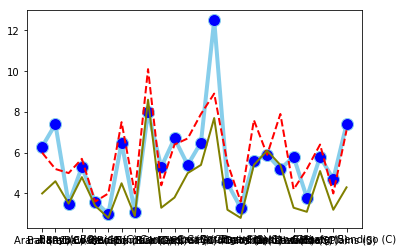

In [98]:
plt.plot( 'LGA', 'Dec-10', data=LGA_VIC[1:25], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)

plt.plot( 'LGA', 'Jun-15', data=LGA_VIC[1:25], marker='', color='red', linewidth=2, linestyle='dashed', label="toto")
plt.plot( 'LGA','Mar-19', data=LGA_VIC[1:25], marker='', color='olive', linewidth=2)


In [ ]:
LGA_uemp_rate
total_emp_uemprate
vacancy

In [14]:
#total_emp_uemprate['Employment Region'].value_counts().plot( kind='bar',title='Unemployment Rate')
#df=total_emp_uemprate.groupby(['Employment Region'])['Id'].count().reset_index()
#total_emp_uemprate.bar('Post Type','Id',data=df,color='magenta',width=0.2,label="Distribution for Post Type 5")

In [71]:
LGA_uemp_rate[LGA_uemp_rate['LGA Code'].str.startswith('2',na=False)]

,LGA Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,Dec-12,...,Jun-17,Sep-17,Dec-17,Mar-18,Jun-18,Sep-18,Dec-18,Mar-19,LGA,State
129,20110,4.1,4.3,4.8,4.8,4.8,4.7,4.3,4.3,4.6,...,3.3,2.7,2.5,2.5,2.5,2.5,2.4,2.3,Alpine (S),
130,20260,6.3,5.5,5.0,4.3,4.1,3.9,3.7,4.1,4.2,...,5.7,6.0,5.9,5.1,4.4,4.4,4.1,4.0,Ararat (RC),
131,20570,7.4,7.0,7.0,6.7,6.2,6.0,5.6,5.4,6.3,...,4.4,3.8,4.2,4.8,4.7,4.6,4.5,4.6,Ballarat (C),
132,20660,3.5,3.3,3.4,3.5,3.9,4.1,4.2,4.3,4.3,...,4.6,4.6,4.3,3.7,3.5,3.3,3.3,3.5,Banyule (C),
133,20740,5.3,5.0,4.8,4.6,4.3,4.3,4.5,4.5,4.6,...,7.3,7.0,6.9,6.9,7.1,6.5,5.5,4.8,Bass Coast (S),
134,20830,3.6,3.6,3.5,3.6,3.3,3.5,3.7,3.7,3.7,...,4.6,4.5,4.5,4.5,4.7,4.5,3.9,3.4,Baw Baw (S),
135,20910,3.0,2.7,2.6,2.8,2.9,3.3,3.3,3.6,3.9,...,3.3,3.5,3.5,3.4,3.3,3.0,2.7,2.8,Bayside (C),
136,21010,6.5,6.3,6.7,6.4,6.1,5.9,5.7,6.1,6.7,...,5.3,4.3,4.2,4.2,4.3,4.3,4.4,4.5,Benalla (RC),
137,21110,3.1,3.0,3.1,3.3,3.1,3.1,3.1,3.1,3.0,...,4.0,4.0,4.0,4.0,3.9,3.7,3.3,2.9,Boroondara (C),
138,21180,8.0,7.8,8.1,8.8,9.5,10.0,10.5,10.4,10.2,...,11.5,11.9,11.9,11.6,11.1,10.3,9.4,8.6,Brimbank (C),
